# 1. Exploratory Data Analysis

 ## Goal :
- At least to undersatand these data : 
- 1st strategi of modelisation : 
 ## Checklist of bases
 ### Analyse of Forme 
 - **Variable target** : position
 - **Lignes and colomn** : (64000, 8)
 - **Types of variables** : float64
 - **Analyse of the miss value** : there is no NAN


# Clustering Methods on Stars Dataset

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [105]:
print(os.listdir("/home/johary/Python_ML/project02/StarCluster"))

['c_0000.csv', 'c_0100.csv', 'c_0200.csv', 'c_0300.csv', 'c_0400.csv', 'c_0500.csv', 'c_0600.csv', 'c_0700.csv', 'c_0800.csv', 'c_0900.csv', 'c_1000.csv', 'c_1100.csv', 'c_1200.csv', 'c_1300.csv', 'c_1400.csv', 'c_1500.csv', 'c_1600.csv', 'c_1700.csv', 'c_1800.csv']


In [106]:
data = pd.read_csv("/home/johary/Python_ML/project02/StarCluster/c_0000.csv",sep=",")

In [107]:
data_df = pd.DataFrame(data)

In [108]:
print(data_df.head())
print(data_df.shape)

          x         y         z        vx        vy        vz         m  id
0  0.485939 -0.524359 -0.531982  0.461539 -0.033776 -0.322765  0.000016   1
1 -0.065961  0.080844 -0.276031 -0.575780  1.107815 -0.293408  0.000016   2
2 -0.034809  0.076795 -0.390880 -0.553991 -0.173861  0.059251  0.000016   3
3  1.502104  1.442983  1.449747 -0.090266  0.326612 -0.310594  0.000016   4
4 -0.009554  0.538341 -0.267264  0.011855 -0.011874 -0.405565  0.000016   5
(64000, 8)


In [109]:
data = data.loc[:,data.columns != 'id']

In [110]:
print(data.dtypes)

x     float64
y     float64
z     float64
vx    float64
vy    float64
vz    float64
m     float64
dtype: object


<Axes: >

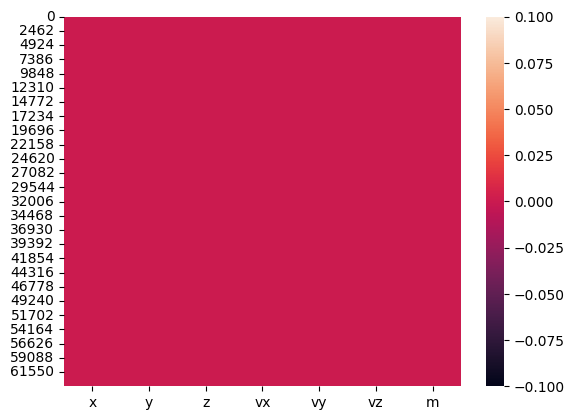

In [111]:
sns.heatmap(data.isna()) #show if we have the missing value

In [112]:
data.head()

,x,y,z,vx,vy,vz,m
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016


In [113]:
df1 = data.iloc[:,[0,3]]

In [114]:
df1.head()

,x,vx
0,0.485939,0.461539
1,-0.065961,-0.575780
2,-0.034809,-0.553991
3,1.502104,-0.090266
4,-0.009554,0.011855


Text(0, 0.5, 'Velocity in X axis of stars')

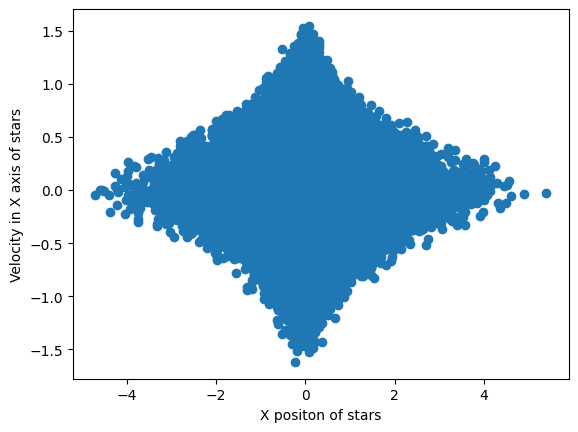

In [115]:
plt.scatter(df1.x,df1.vx)
plt.xlabel("X positon of stars")
plt.ylabel("Velocity in X axis of stars")

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
x_stand = StandardScaler().fit_transform(df1)

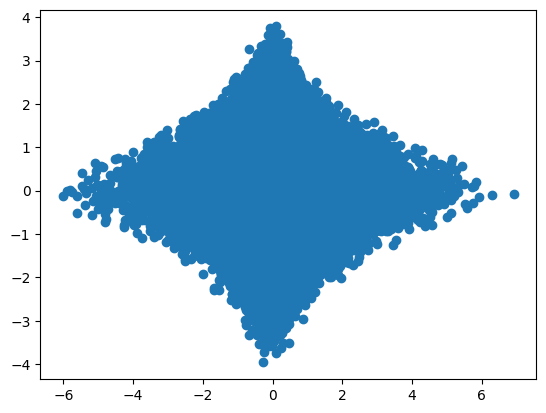

In [118]:
plt.scatter(x_stand[:,0],x_stand[:,1])

# looking for the nombre of cluster we need 

In [119]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'list1')

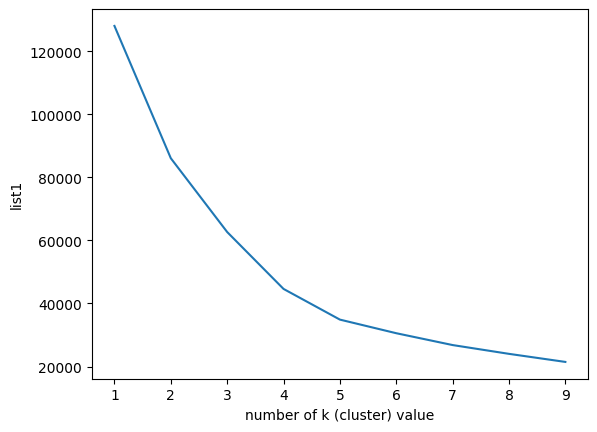

In [120]:

list1 = []

for k in range(1,10):
    mod = KMeans(n_clusters = k)
    mod.fit(x_stand)
    list1.append(mod.inertia_) # inertia means that find to value of list1
    
plt.plot(range(1,10),list1)
plt.xlabel("number of k (cluster) value")
plt.ylabel("list1")


In [121]:
from kneed import KneeLocator

knee = KneeLocator(range(1,10), list1, curve = 'convex', direction = 'decreasing')
print(f'Cluster points: {knee.elbow}')

Cluster points: 4


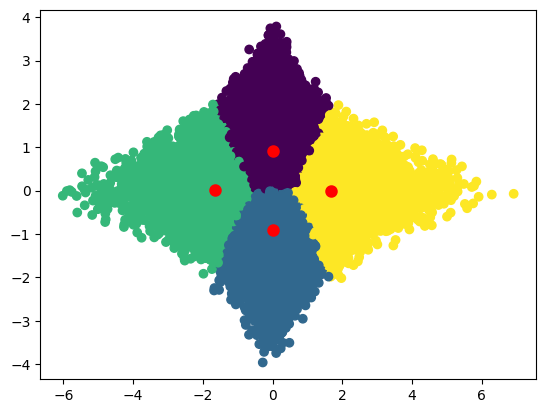

In [122]:
model = KMeans(n_clusters=4)
clusters = model.fit_predict(x_stand)


plt.scatter(x_stand[:, 0], x_stand[:, 1], c = clusters)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], linewidths=3, color='red')


In [123]:
#Elbow Method
inertia = np.empty(10)
k_range = range(1,10)
for k in k_range:
    mod1 = KMeans(n_clusters = k)
    mod1.fit(x_stand)
    inertia[k] = model.inertia_

Text(0, 0.5, 'cout du model (inertia)')

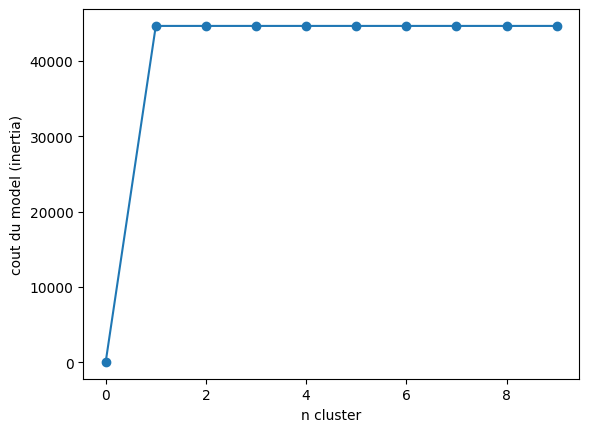

In [124]:
plt.plot(range(0,10),inertia,'-o')
plt.xlabel('n cluster')
plt.ylabel('cout du model (inertia)')

In [127]:
df2 = df1.iloc[:,df1.columns != 'label'].head(1000)

In [128]:
df2.head()

,x,vx
0,0.485939,0.461539
1,-0.065961,-0.575780
2,-0.034809,-0.553991
3,1.502104,-0.090266
4,-0.009554,0.011855


# 4. Hierarchical Clustering

Text(0, 0.5, 'euclidean distance')

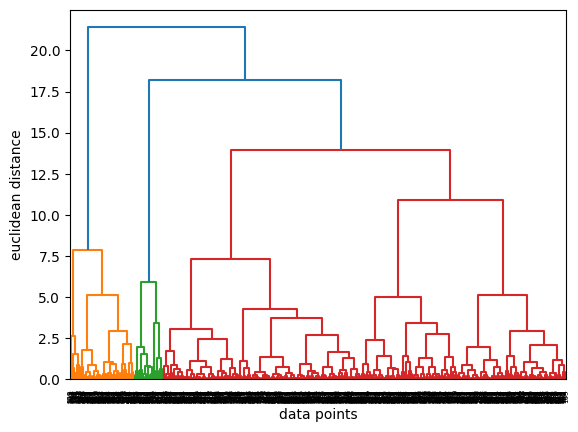

In [130]:
# dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(df2, method="ward") # scipy is an algorithm of hiyerarchal clusturing
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")

In [133]:
from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters=4,linkage="ward")
cluster = hiyerartical_cluster.fit_predict(df2)

df2["label"] = cluster

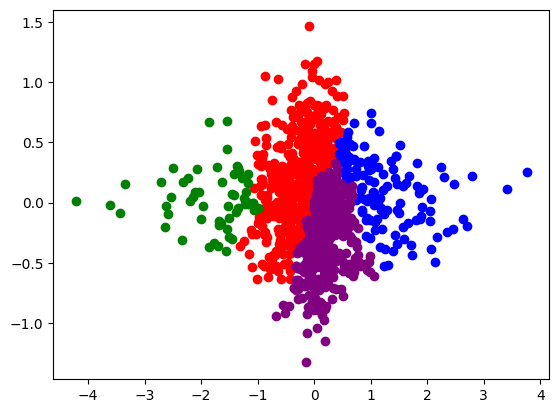

In [135]:
plt.scatter(df2.x[df2.label == 0], df2.vx[df2.label == 0], color="red")
plt.scatter(df2.x[df2.label == 1], df2.vx[df2.label == 1], color="blue")
plt.scatter(df2.x[df2.label == 2], df2.vx[df2.label == 2], color="green")
plt.scatter(df2.x[df2.label == 3], df2.vx[df2.label == 3], color="purple")